In [132]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from gensit.utils.misc_utils import *

from gensit.static.plot_variables import *
from gensit.static.global_variables import *


# LaTeX font configuration
mpl.rcParams.update(LATEX_RC_PARAMETERS)

In [133]:
node_gt_pairs = [
    (50,1_000_000),
    (100,1_000_000),
    (150,1_000_000),
    (200,1_000_000),
    (250,10_000),
    (250,100_000),
    (250,250_000),
    (250,500_000),
    (250,1_000_000)
]

In [134]:
# for node,total in tqdm(node_gt_pairs):
#     dataset = f"synthetic_{node}x{node}_total_{total}"
#     ground_truth_table = np.loadtxt(f'../data/inputs/synthetic/{dataset}/ground_truth_table.txt')
#     I,J = np.shape(ground_truth_table)
#     training_cells = np.array([ [i,j] for i in range(I) for j in range(0,J//2)], dtype=np.int32)
#     test_cells = np.array([ [i,j] for i in range(I) for j in range(J//2,J)], dtype=np.int32)
#     os.mkdir(f"../data/inputs/synthetic/{dataset}/constraints/")
#     np.savetxt(f"../data/inputs/synthetic/{dataset}/constraints/training_cells_50%.txt",training_cells)
#     np.savetxt(f"../data/inputs/synthetic/{dataset}/constraints/test_cells_50%.txt",test_cells)

In [135]:
# nodes = 500
# total = 250_000


# dataset = f"synthetic_{nodes}x{nodes}_total_{total}"
# ground_truth_table = np.loadtxt(f'../data/inputs/synthetic/{dataset}/ground_truth_table.txt')
# cost_matrix = np.loadtxt(f'../data/inputs/synthetic/{dataset}/cost_matrix.txt')
# I,J = np.shape(ground_truth_table)

# Computation time figure

In [159]:
total_compute = read_json("../data/outputs/synthetic/paper_figures/figure0/gensit_total_compute_times_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")
table_compute = read_json("../data/outputs/synthetic/paper_figures/figure0/gensit_table_compute_times_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")
intensity_compute = read_json("../data/outputs/synthetic/paper_figures/figure0/gensit_intensity_compute_times_label_type_markersize_1.0_linewidth_1.0_opacity_1.0_hatchopacity_1.0_data.json")

total_compute = {
    "x": np.array(list(flatten(total_compute['x']))),
    "y": np.array(list(flatten(total_compute['y']))),
    "label": np.array(total_compute['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(total_compute['x'])))])
}
table_compute = {
    "x": np.array(list(flatten(table_compute['x']))),
    "y": np.array(list(flatten(table_compute['y']))),
    "label": np.array(table_compute['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(table_compute['x'])))])
}
intensity_compute = {
    "x": np.array(list(flatten(intensity_compute['x']))),
    "y": np.array(list(flatten(intensity_compute['y']))),
    "label": np.array(intensity_compute['label']),
    "order": np.argsort([int(x.split('x')[0]) for x in list(flatten(np.array(intensity_compute['x'])))])
}

# Re-order 
total_compute['x'] = list(total_compute['x'][total_compute['order']])
total_compute['y'] = list(total_compute['y'][total_compute['order']])
total_compute['label'] = list(total_compute['label'][total_compute['order']])

table_compute['x'] = list(table_compute['x'][table_compute['order']])
table_compute['y'] = list(table_compute['y'][table_compute['order']])
table_compute['label'] = list(table_compute['label'][table_compute['order']])

intensity_compute['x'] = list(intensity_compute['x'][intensity_compute['order']])
intensity_compute['y'] = list(intensity_compute['y'][intensity_compute['order']])
intensity_compute['label'] = list(intensity_compute['label'][intensity_compute['order']])

# Color
colours = {
    'Disjoint (\\frameworktag)': "blue",
    'Joint (\\frameworktag)': "green",
    '\\gaskinframeworktag': "red"
}
total_compute['colour'] = [colours[l] for l in total_compute['label']]
table_compute['colour'] = [colours[l] for l in table_compute['label']]
intensity_compute['colour'] = [colours[l] for l in intensity_compute['label']]

In [163]:
LABEL_SIZE = 20
LEGEND_SIZE = 20
TICK_PAD = 0
TICK_SIZE = 20
TICK_ROTATION = 0
Y_LABELS = ['Total Compute Time (secs)','Table Sampling Time (secs)','Intensity Learning Time (secs)']
filepath = "../data/outputs/synthetic/paper_figures/figure0/gensit_computation_time_scalability_with_dimension"

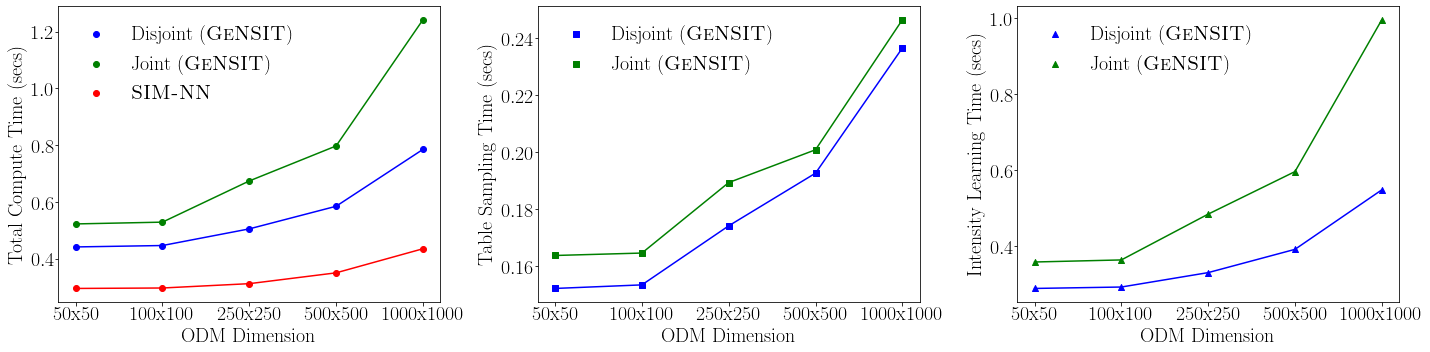

In [183]:
fig, axs = plt.subplots(1,3,figsize=(20,5))

for i in range(len(total_compute['x'])):
    axs[0].scatter(
        x = total_compute['x'][i],
        y = total_compute['y'][i],
        label = total_compute['label'][i],
        c = total_compute['colour'][i],
        marker = 'o'
    )
for k in range(3):
    axs[0].plot(
        total_compute['x'][k::3],
        total_compute['y'][k::3],
        color = total_compute['colour'][k::3][0]
    )

for i in range(len(table_compute['x'])):
    axs[1].scatter(
        x = table_compute['x'][i],
        y = table_compute['y'][i],
        label = table_compute['label'][i],
        c = table_compute['colour'][i],
        marker = 's'
    )
for k in range(2):
    axs[1].plot(
        table_compute['x'][k::2],
        table_compute['y'][k::2],
        color = table_compute['colour'][k::3][0]
    )


for i in range(len(intensity_compute['x'])):
    axs[2].scatter(
        x = intensity_compute['x'][i],
        y = intensity_compute['y'][i],
        label = intensity_compute['label'][i],
        c = intensity_compute['colour'][i],
        marker = '^'
    )
for k in range(2):
    axs[2].plot(
        intensity_compute['x'][k::2],
        intensity_compute['y'][k::2],
        color = intensity_compute['colour'][k::3][0]
    )


for j,ax in enumerate(axs):
    # Create dictionary of labels
    by_label = {}
    handles, label, label_split = [],[],[]
    # Ensure no duplicate entries in legend exist
    ax_handles, ax_labels = ax.get_legend_handles_labels()
    # Convert everything to numpy arrays
    ax_label_split = [lab.split(', ') for lab in ax_labels]

    # Add legend handles and labels to list
    handles += ax_handles
    label_split += ax_label_split
    label += ax_labels

    label_split = np.array(label_split,dtype='str')
    # Sort label first by first label, then by second etc.
    index_sorted = np.lexsort(label_split.T)
    # Do not worry about duplicates. These will be handled here
    # Create dictionary of label
    by_label = dict(zip(
        np.array(label)[index_sorted].tolist(), 
        np.array(handles)[index_sorted].tolist()
    ))

    # If more than one column are provided split legend patches and keys
    # into sublists of length ncols
    leg = ax.legend(
        flip(list(by_label.values()), 1), 
        flip(list(by_label.keys()), 1),
        frameon = False,
        prop = {'size':LEGEND_SIZE},
    )
    leg._ncol = 1

    ax.set_ylabel(Y_LABELS[j],fontsize=LABEL_SIZE)
    ax.set_xlabel('ODM Dimension',fontsize=LABEL_SIZE)
    ax.tick_params(
        pad = TICK_PAD,
        bottom = True,
        labelsize = TICK_SIZE,
        rotation = TICK_ROTATION
    )

# fig.tight_layout(rect=(0, 0, 0.7, 1.1))
fig.tight_layout(rect=(0, 0, 1, 1))
plt.show()
# Write figure
write_figure(
    fig,
    filepath,
    figure_format = 'pdf'
)